# 주제 분석과 LSA
주제분석 : 지도학습으로 비지도학습을 학습  
일반적인 지식들을 적용해서 그전에는 몰랐던 값을 도출
## LSA : 잠재 문서 분석 - 행렬을 분해해서 주제(단어가 얼마나 자주 나오는지 빈도수를 나타낸 숫자)를 만들어냄
      주제가 연속변수라고 가정
      각각의 주제에 가중치를 곱하고 더하면 TDM(단어문서행렬)이 된다고 가정
      
LSA의 기본 아이디어 : x가 있고 이걸 둘로 나누면 선형 모형과 비슷. 선형과 차이는 z를 모른다는것. 그러나 선형 모형처럼 되서 LSA를 하게 되면 관찰하지 않을 잠재변수를 마치 선형 모형처럼 만들어서 x가 나오는것처럼 해서 문제를 풀 수 있다
단어문서행렬 x = z*w  

차원 축소 : z의 k열을 x의 n열보다 작게  
x는 단어로 표현하지만 z는 주제로 표현  


행렬 분해
 : 하나의 행렬을 여러 개의 행렬의 곱 형태로 나타내는 것
 x라는 행렬이 있으면 두 개 이상의 곱으로 표현
 
 
## 특이값 분해(SVD)
표의 상당 부분을 지워도 원래 표 처럼 된다  
표를 3개로 나눠서 3개를 곱하면 원래대로 돌아오게 함  
차원축소 : 단어 행에 대한 것들을 나타내면 비슷한 의미나 오탈자도 카운트를 따로 하는 것들을 어느정도 해결할 수 있다.
ex. (국수, 면) 이나 (흙, 흑)을 다르게 취급

# LSA 실습
## 주제 분석을 위한 전처리
neur IPS 학회 이용

In [3]:
pip install wget

  Using cached wget-3.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
import wget
wget.download('https://github.com/euphoris/datasets/raw/master/neurips.zip')

100% [..........................................................................] 1357662 / 1357662

'neurips.zip'

In [54]:
import pandas as pd
df = pd.read_csv('neurips.zip')
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [55]:
df.tail()

,year,title,abstract
3915,2017,"On Separability of Loss Functions, and Revisit...",We revisit the classical analysis of generativ...
3916,2017,Maxing and Ranking with Few Assumptions,PAC maximum ...
3917,2017,On clustering network-valued data,"Community detection, which focuses on clusteri..."
3918,2017,A General Framework for Robust Interactive Lea...,We propose a general framework for interactive...
3919,2017,Multi-view Matrix Factorization for Linear Dyn...,We consider maximum likelihood estimation of l...


 CountVectorizer, TfidVectorizer 차이 보기

In [56]:
# 자주 나오는 것들 CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=2000)
# 영어 불용어 제거, 단어 2000개 까지만 뽑음
cv

CountVectorizer(max_features=2000, stop_words='english')

In [28]:
# 여러 문서에서 자주 나오는 것들 TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words='english', max_features=2000)
# 영어 불용어 제거, 단어 2000개 까지만 뽑음
cv

TfidfVectorizer(max_features=2000, stop_words='english')

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = TfidfVectorizer(stop_words='english', max_features=2000)

In [73]:
x = cv.fit_transform(df.abstract)
x

<3920x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 216854 stored elements in Compressed Sparse Row format>

In [74]:
words = cv.get_feature_names()
words

['000',
 '10',
 '100',
 '20',
 '2d',
 '3d',
 'ability',
 'able',
 'absolute',
 'abstract',
 'accelerated',
 'access',
 'according',
 'account',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'action',
 'actions',
 'activation',
 'activations',
 'active',
 'activities',
 'activity',
 'actor',
 'actually',
 'ad',
 'adapt',
 'adaptation',
 'adapted',
 'adaptive',
 'adaptively',
 'addition',
 'additional',
 'additionally',
 'additive',
 'address',
 'addressed',
 'addresses',
 'admits',
 'admm',
 'advances',
 'advantage',
 'advantages',
 'adversarial',
 'adversary',
 'affine',
 'affinity',
 'agent',
 'agents',
 'aggregation',
 'agnostic',
 'aim',
 'aims',
 'al',
 'algorithm',
 'algorithmic',
 'algorithms',
 'alignment',
 'allocation',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'alpha',
 'alternating',
 'alternative',
 'alternatives',
 'amounts',
 'analyses',
 'analysis',
 'analytic',
 'analytical',
 'analytically',
 'analyze',


In [59]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
x.shape

(3920, 2000)

In [60]:
svd.fit(x)    # fit_transform을 이런식으로도 할 수 있다?

TruncatedSVD(n_components=100, random_state=1234)

In [61]:
svd.components_.shape

(100, 2000)

In [62]:
svd.components_
# 차원의 값이 1 증가하면 리스트의 값 만큼 증가한다는 말
# 1 증가하면 첫번째는 0.00483684만큼 증가

array([[ 0.00483864,  0.01243762,  0.004755  , ...,  0.00491457,
         0.0162017 ,  0.01160996],
       [-0.0055402 , -0.01859974, -0.00681511, ...,  0.00074343,
         0.0014955 ,  0.00839796],
       [-0.00331551, -0.02285996, -0.00537686, ..., -0.00103497,
         0.00135762, -0.00786135],
       ...,
       [-0.00037104,  0.02843677,  0.00591093, ...,  0.0027189 ,
         0.01184353, -0.01022713],
       [ 0.00286079, -0.02232737, -0.00742612, ...,  0.00374566,
        -0.00553911, -0.00644252],
       [ 0.00840489,  0.00073834,  0.00954845, ..., -0.00397496,
        -0.00763423, -0.00401217]])

In [69]:
# 특정 단어가 몇 번째에 위치하는지
word_idx = words.index('topic')
word_idx

1861

In [70]:
svd.components_[:, word_idx]

array([ 2.21636837e-02, -3.35006049e-02,  6.34481186e-02, -9.08255574e-03,
       -2.59052356e-02, -3.04093871e-02,  4.31240860e-02, -4.44698174e-02,
       -5.35017435e-02,  2.51650395e-02, -7.43829615e-02, -4.09887607e-02,
        1.43222364e-03,  9.13531186e-02, -5.15778667e-02,  1.43561806e-02,
        1.43079857e-02,  1.08711712e-01, -1.99153193e-02,  9.44076667e-02,
       -1.49543745e-01,  7.67068611e-02, -9.41560593e-02,  1.36303047e-02,
       -4.61174101e-02,  1.04014531e-01,  1.14117206e-01,  1.99617317e-01,
        3.19722162e-02,  6.47920314e-02, -9.24920865e-02,  2.24452596e-02,
        1.25802356e-02,  1.57600255e-02,  3.03693389e-02, -1.57972126e-01,
       -6.85859397e-02, -2.71583590e-02, -4.23475068e-02,  6.59471303e-03,
       -7.82198356e-02,  6.56273694e-02,  1.66759836e-02,  5.84677258e-02,
        1.36793675e-02, -4.11903979e-02,  2.94849115e-02, -2.23744287e-02,
       -7.98992089e-02,  7.03076161e-02, -8.41267895e-02, -9.61470800e-02,
       -6.79298440e-02, -

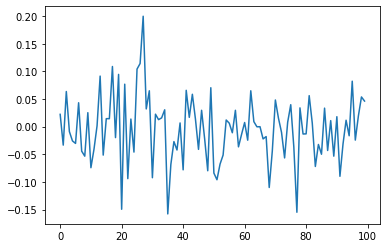

In [71]:
from matplotlib import pyplot
pyplot.plot(svd.components_[:, word_idx])

In [72]:
topic_idx = svd.components_[:, word_idx].argmax()
topic_idx

27